In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import env
import os
import wrangle

In [2]:
url = env.get_db_url('zillow')
df = pd.read_sql('''select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
from propertylandusetype
	join properties_2017
		using (propertylandusetypeid)
WHERE propertylandusedesc = ("Single Family Residential");''', url)

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
#verbose expands the info
#show_counts then shows all the null values in each column
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [26]:
df = df.rename(columns={'bedroomcnt' : 'bedrooms',
                       'bathroomcnt' : 'bathrooms',
                       'calculatedfinishedsquarefeet' : 'squarefeet',
                       'taxvaluedollarcnt' : 'salesamount'
                       'fips' : 'county'})

In [27]:
df.head()

,bedrooms,bathrooms,squarefeet,salesamount,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [28]:
df.isnull().sum()

bedrooms       0
bathrooms      0
squarefeet     0
salesamount    0
yearbuilt      0
taxamount      0
fips           0
dtype: int64

In [6]:
df.shape

(2152863, 7)

In [7]:
#Dropped nulls which drops 0.58% of the original data
df = df.dropna()
df.shape

(2140235, 7)

In [8]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [31]:
df['bedrooms'].value_counts(dropna=False)

bedrooms
3     962944
4     633608
2     334221
5     150671
6      25117
1      22895
7       4792
0       4397
8       1103
9        290
10       118
11        34
13        15
12        12
14         7
15         5
18         3
16         2
25         1
Name: count, dtype: int64

In [32]:
df.bathrooms.value_counts(dropna=False)

bathrooms
2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: count, dtype: int64

In [33]:
df.squarefeet.value_counts(dropna=False)

squarefeet
1200     5184
1080     4376
1120     4354
1400     3828
1440     3684
         ... 
10180       1
13169       1
9095        1
10525       1
24920       1
Name: count, Length: 10557, dtype: int64

In [34]:
df.salesamount.value_counts(dropna=False)

salesamount
450000    820
500000    774
400000    723
430000    690
440000    683
         ... 
729523      1
940139      1
545367      1
38804       1
536061      1
Name: count, Length: 588178, dtype: int64

In [13]:
df.yearbuilt.value_counts(dropna=False)

yearbuilt
1955.0    84329
1950.0    71606
1954.0    69069
1953.0    62270
1956.0    61858
          ...  
1855.0        1
1879.0        1
1833.0        1
1840.0        1
1874.0        1
Name: count, Length: 153, dtype: int64

In [14]:
df.taxamount.value_counts(dropna=False)

taxamount
345.72      172
344.18       76
343.52       74
49.18        46
388.18       37
           ... 
8191.38       1
11627.92      1
15008.68      1
9227.22       1
13494.52      1
Name: count, Length: 915868, dtype: int64

In [15]:
df.fips.value_counts(dropna=False)

fips
6037.0    1425207
6059.0     552057
6111.0     162971
Name: count, dtype: int64

In [16]:
df.bedrooms = df.bedrooms.astype(int)
df.squarefeet = df.squarefeet.astype(int)
df.salesamount = df.salesamount.astype(int)
df.yearbuilt = df.yearbuilt.astype(int)
df.county = df.county.astype(int)

In [ ]:
df.county = 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             int64  
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(2), int64(5)
memory usage: 130.6 MB


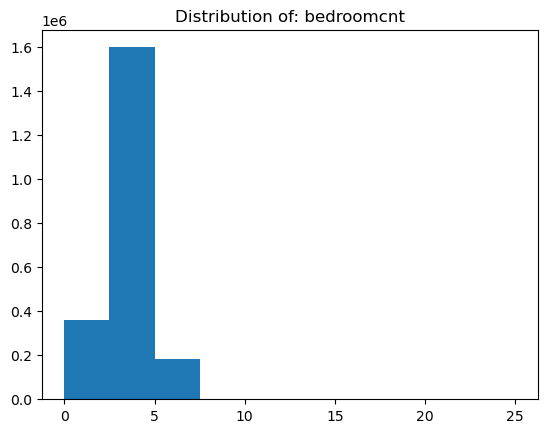

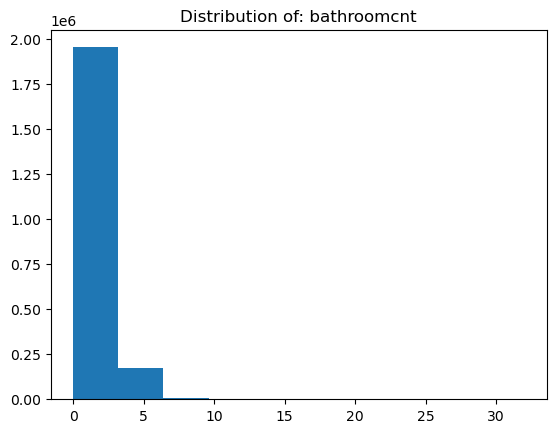

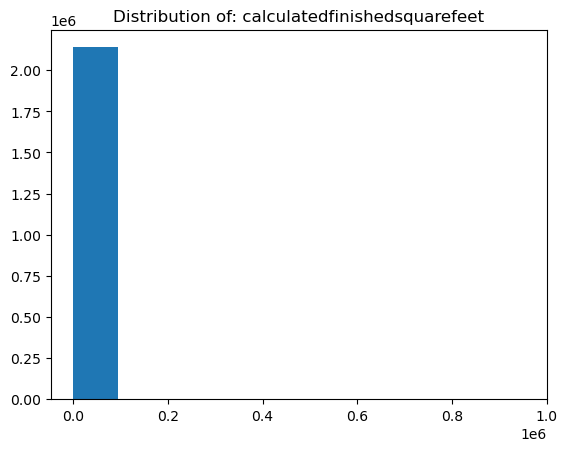

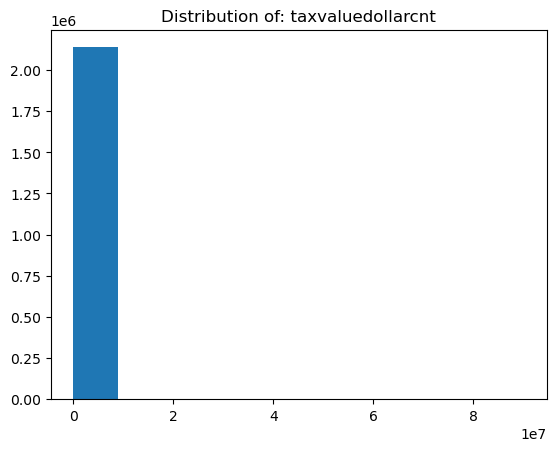

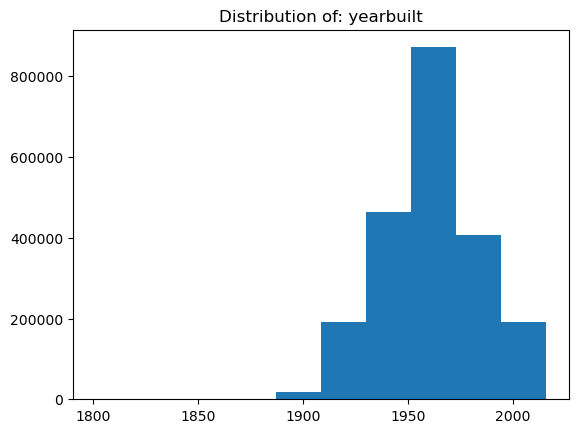

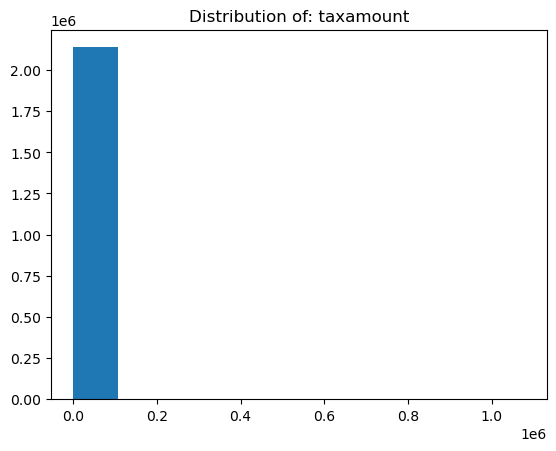

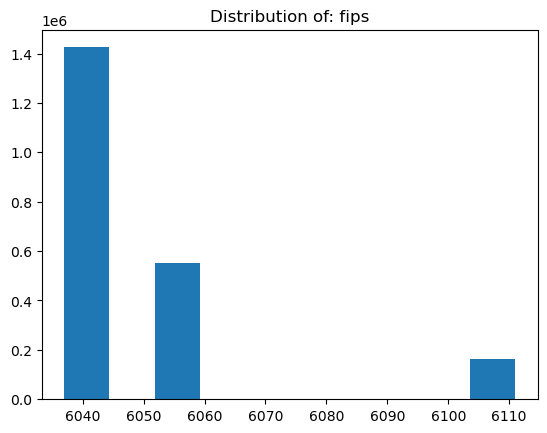

In [18]:
cols = df.columns

for col in cols:
    plt.hist(df[col])
    plt.title(f'Distribution of: {col}')
    plt.show()

In [19]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [20]:
df = wrangle.wrangle_zillow()
df.head()

this file exists, reading from csv


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [21]:
df['salesamount'].value_counts(bins=5)

taxvaluedollarcnt
(-90166.441, 18037710.0]    2139958
(18037710.0, 36075398.0]        250
(36075398.0, 54113086.0]         18
(54113086.0, 72150774.0]          6
(72150774.0, 90188462.0]          3
Name: count, dtype: int64

In [22]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [37]:
train, val, test = wrangle.split_data(df)

In [38]:
print(train.shape)
print(val.shape)
print(test.shape)

(1284141, 7)
(428047, 7)
(428047, 7)


In [40]:
train.salesamount.value_counts()

salesamount
450000     503
500000     475
400000     439
550000     433
430000     419
          ... 
333175       1
713047       1
343465       1
1831464      1
300584       1
Name: count, Length: 446402, dtype: int64